In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### <font color="orange">TASK</font>

In [109]:
# YOUR CODE HERE

In [110]:
# HELPER CELL - RUN IT!

# Tasks

1. Find the mean completion rates across males and females.
2. Investigate why the mean completion rates are so low.
3. Find the correlation coefficient between the numerical variables
4. Find what variables is the most correlated without target variables.
5. Find the connection between birth rate and enrollment rate.
6. Document your results.

# <font color="orange">TASK</font> - Read our data

Read our data into a Pandas DataFrame.
Note: You might need to use **encoding='latin-1'**.

In [111]:
df = pd.read_csv('./data/Global_Education.csv', encoding='latin-1')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

# <font color="orange">TASK</font> - Fix columns

Have a look at the columns in the dataset.
Replace whitespace with underscore (“_”)

1. If there are any whitespaces between words in columns should be replaced with underscore.
2. Remove any whitespaces before or after columns labels.
3. Remove any other anomalies into columns names.

In [113]:
df.columns

Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Edu

In [114]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [115]:
df.columns

Index(['Countries_and_areas', 'Latitude', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Educ

# <font color="orange">TASK</font> - Drop unnecessary data

Drop the Latitude and Longitude columns since we are not going to use them.

In [116]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [117]:
df.columns

Index(['Countries_and_areas', 'OOSR_Pre0Primary_Age_Male',
       'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male',
       'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male',
       'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male',
       'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Education_Enrollment', 'Unemp

# <font color="orange">TASK</font> - Derive basic statistics

Observe the **data type** of all the columns in the dataset.
If most of them are ints and floats, derive basic statistics about the dataset using the ***.describe()*** method


In [118]:
df.describe()

,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,41.722772,42.128713,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,42.162708,43.099714,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,37.500000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,87.500000,92.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,100.000000,100.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


# <font color="orange">TASK</font> - Find number of rows and columns

Present the number of rows and number of columns in the dataset in the following format: "Number of rows: {rows}, number of columns: {columns}"

In [119]:
rows = df.shape[0]
cols = df.shape[1]

In [120]:
# `df.shape` returns tuple in format (rows, columns)
df.shape

(202, 27)

In [121]:
print(f'Number of rows: {rows}, number of columns: {cols}')

Number of rows: 202, number of columns: 27


# <font color="orange">TASK</font> - Find missing values

Check for missing values. Are there any?
On separate lines, print the null rate of every column that contains null values in the following format:
"{column1} null rate: {null_rate1}"
"{column2} null rate: {null_rate2}"

In [122]:
# if no any null values there will be no output
for col in df.columns:
    if df[col].isna().any():
        null_rate = df[col].isna().sum() / len(df[col])
        print(f'{col} null rate: {null_rate:.4f}')

In [123]:
# this is example only to show that null rate for all columns is 0.0
for col in df.columns:
    null_rate = df[col].isna().sum() / len(df[col])
    print(f'`{col}` null rate: {null_rate}')

`Countries_and_areas` null rate: 0.0
`OOSR_Pre0Primary_Age_Male` null rate: 0.0
`OOSR_Pre0Primary_Age_Female` null rate: 0.0
`OOSR_Primary_Age_Male` null rate: 0.0
`OOSR_Primary_Age_Female` null rate: 0.0
`OOSR_Lower_Secondary_Age_Male` null rate: 0.0
`OOSR_Lower_Secondary_Age_Female` null rate: 0.0
`OOSR_Upper_Secondary_Age_Male` null rate: 0.0
`OOSR_Upper_Secondary_Age_Female` null rate: 0.0
`Completion_Rate_Primary_Male` null rate: 0.0
`Completion_Rate_Primary_Female` null rate: 0.0
`Completion_Rate_Lower_Secondary_Male` null rate: 0.0
`Completion_Rate_Lower_Secondary_Female` null rate: 0.0
`Completion_Rate_Upper_Secondary_Male` null rate: 0.0
`Completion_Rate_Upper_Secondary_Female` null rate: 0.0
`Grade_2_3_Proficiency_Reading` null rate: 0.0
`Grade_2_3_Proficiency_Math` null rate: 0.0
`Primary_End_Proficiency_Reading` null rate: 0.0
`Primary_End_Proficiency_Math` null rate: 0.0
`Lower_Secondary_End_Proficiency_Reading` null rate: 0.0
`Lower_Secondary_End_Proficiency_Math` null ra

# <font color="orange">TASK</font> - Deal with missing values

**Replace** missing values with the most frequently met value in each respective column (**mode**).

In [124]:
# `mode()` returns object with index and value, we can take the value with `.mode()[0]`
df['Gross_Tertiary_Education_Enrollment'].mode()[0]

0.0

In [125]:
for col in df.columns:
    if df[col].isna().any():
        # found the mode for current col
        mode = df[col].mode()[0]
        # replace the null values with mode for current col
        df[col] = df[col].fillna(mode)

In [126]:
# check for null values after replacement null values with `mean()`
df.isna().any()

Countries_and_areas                        False
OOSR_Pre0Primary_Age_Male                  False
OOSR_Pre0Primary_Age_Female                False
OOSR_Primary_Age_Male                      False
OOSR_Primary_Age_Female                    False
OOSR_Lower_Secondary_Age_Male              False
OOSR_Lower_Secondary_Age_Female            False
OOSR_Upper_Secondary_Age_Male              False
OOSR_Upper_Secondary_Age_Female            False
Completion_Rate_Primary_Male               False
Completion_Rate_Primary_Female             False
Completion_Rate_Lower_Secondary_Male       False
Completion_Rate_Lower_Secondary_Female     False
Completion_Rate_Upper_Secondary_Male       False
Completion_Rate_Upper_Secondary_Female     False
Grade_2_3_Proficiency_Reading              False
Grade_2_3_Proficiency_Math                 False
Primary_End_Proficiency_Reading            False
Primary_End_Proficiency_Math               False
Lower_Secondary_End_Proficiency_Reading    False
Lower_Secondary_End_

# <font color="orange">TASK</font> - Find duplicates

Check for duplicates. Are there any?

In [127]:
df.duplicated().any()

False

In [128]:
# using `.drop_duplicates() to drop rows
df.drop_duplicates()

,Countries_and_areas,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Completion_Rate_Primary_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,0,0,0,0,0,0,44,69,67,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,4,2,6,3,6,1,21,15,94,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,0,0,0,0,0,0,0,0,93,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,31,39,0,0,0,0,0,0,63,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,14,14,10,10,15,13,28,19,0,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
198,Vietnam,0,0,0,0,0,0,0,0,96,...,55,51,86,81,98,98,16.75,110.6,28.5,2.01
199,Yemen,96,96,10,21,23,34,46,68,70,...,0,0,0,0,0,0,30.45,93.6,10.2,12.91
200,Zambia,0,0,17,13,0,0,0,0,71,...,0,0,5,2,93,92,36.19,98.7,4.1,11.43


# <font color="orange">TASK</font> - Create a new DataFrame

Create a new DataFrame which contains ***all the completion rates (average)*** by country.
Create a ***new column*** in the Dataframe, which contains the average completion rates per country.

In [129]:
# Takes only the columns which starts with 'Completion'
completion_columns = df.columns[df.columns.str.startswith('Completion')]

# Group by 'Countries_and_areas' in [] we define which columns to take in new DataFrame and find the average(mean).
completion_rates_by_country = df.groupby(by='Countries_and_areas')[completion_columns].mean()
completion_rates_by_country

,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,Completion_Rate_Lower_Secondary_Male,Completion_Rate_Lower_Secondary_Female,Completion_Rate_Upper_Secondary_Male,Completion_Rate_Upper_Secondary_Female
Countries_and_areas,,,,,,
Afghanistan,67.0,40.0,49.0,26.0,32.0,14.0
Albania,94.0,96.0,98.0,97.0,76.0,80.0
Algeria,93.0,93.0,49.0,65.0,22.0,37.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0
Angola,63.0,57.0,42.0,32.0,24.0,15.0
...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,96.0,97.0,81.0,87.0,50.0,61.0
Yemen,70.0,55.0,55.0,39.0,37.0,23.0


In [130]:
# In this case we do not have column with name `Average_completion_rate` which will create a new column with this name at the end of DataFrame
# `completion_rates_by_country.mean(axis=1)` - found the mean by row
completion_rates_by_country['Average_completion_rate'] = completion_rates_by_country.mean(axis=1)
completion_rates_by_country

,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,Completion_Rate_Lower_Secondary_Male,Completion_Rate_Lower_Secondary_Female,Completion_Rate_Upper_Secondary_Male,Completion_Rate_Upper_Secondary_Female,Average_completion_rate
Countries_and_areas,,,,,,,
Afghanistan,67.0,40.0,49.0,26.0,32.0,14.0,38.000000
Albania,94.0,96.0,98.0,97.0,76.0,80.0,90.166667
Algeria,93.0,93.0,49.0,65.0,22.0,37.0,59.833333
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Angola,63.0,57.0,42.0,32.0,24.0,15.0,38.833333
...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Vietnam,96.0,97.0,81.0,87.0,50.0,61.0,78.666667
Yemen,70.0,55.0,55.0,39.0,37.0,23.0,46.500000


# <font color="orange">TASK</font> - Top 10 and Bottom 10 countries

Plot a bar plot of the top 10 countries and bottom 10 countries by average completion rate.
Note: You can try using the ***.plot(kind=’bar’)*** method from Pandas.


In [131]:
sorted_completion_rate = completion_rates_by_country.sort_values(by='Average_completion_rate', ascending=False)
sorted_completion_rate

,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,Completion_Rate_Lower_Secondary_Male,Completion_Rate_Lower_Secondary_Female,Completion_Rate_Upper_Secondary_Male,Completion_Rate_Upper_Secondary_Female,Average_completion_rate
Countries_and_areas,,,,,,,
North Korea,100.0,100.0,100.0,100.0,100.0,100.0,100.000000
Ukraine,100.0,99.0,100.0,100.0,97.0,97.0,98.833333
Kazakhstan,100.0,100.0,100.0,100.0,95.0,96.0,98.500000
Turkmenistan,100.0,100.0,99.0,100.0,93.0,95.0,97.833333
Belarus,100.0,100.0,100.0,100.0,91.0,94.0,97.500000
...,...,...,...,...,...,...,...
Fiji,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Nicaragua,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
New Zealand,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [132]:
top_10_countries = sorted_completion_rate.head(10)
bottom_10_countries = sorted_completion_rate.tail(10)

In [133]:
# same as above !!!
# top_10_countries  = completion_rates_by_country.nlargest(10, 'Average_completion_rate')
# bottom_10_countries = completion_rates_by_country.nsmallest(10, 'Average_completion_rate')

In [134]:
# our x will be the name of the countries
top_10_countries.index.values

array(['North Korea', 'Ukraine', 'Kazakhstan', 'Turkmenistan', 'Belarus',
       'Barbados', 'Bosnia and Herzegovina', 'Kyrgyzstan', 'Cuba',
       'Georgia'], dtype=object)

In [135]:
# our `y` will be the 'Average_completion_rate'
top_10_countries['Average_completion_rate']

Countries_and_areas
North Korea               100.000000
Ukraine                    98.833333
Kazakhstan                 98.500000
Turkmenistan               97.833333
Belarus                    97.500000
Barbados                   97.000000
Bosnia and Herzegovina     96.166667
Kyrgyzstan                 95.166667
Cuba                       93.666667
Georgia                    93.000000
Name: Average_completion_rate, dtype: float64

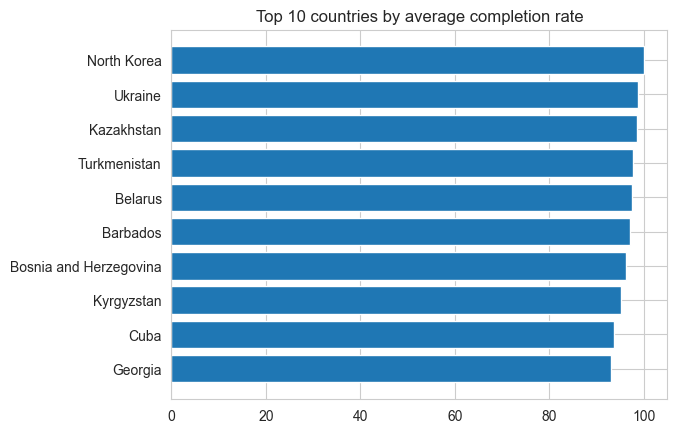

In [136]:
# we are using `[::-1]` because the barchart always display the data ascending
plt.barh(top_10_countries.index.values[::-1], top_10_countries['Average_completion_rate'][::-1])
plt.title('Top 10 countries by average completion rate')
plt.show()

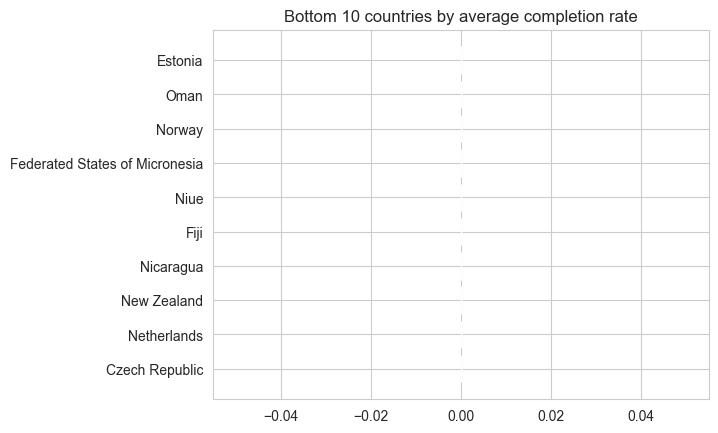

In [137]:
# the data in this DataFrame is not good to shown bottom 10 countries by average completion rate
plt.barh(bottom_10_countries.index.values[::-1], bottom_10_countries['Average_completion_rate'][::-1])
plt.title('Bottom 10 countries by average completion rate')
plt.show()

# <font color="orange">TASK</font> - Columns with completion rates

Create a variable which stores all columns names of columns which contain information about the ***completion rates*** of ***male*** observations.
Do the same with ***females***.


In [138]:
# For male takes from DF only columns which starts with 'Completion' and ends whit 'Male'.
# same for female
male_columns_completion = df.columns[(df.columns.str.startswith('Completion')) & (df.columns.str.endswith('Male'))]
female_columns_completion = df.columns[(df.columns.str.startswith('Completion')) & (df.columns.str.endswith('Female'))]

In [139]:
male_columns_completion

Index(['Completion_Rate_Primary_Male', 'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Male'],
      dtype='object')

# <font color="orange">TASK</font> - Mean of male completion rates

Find what is the mean completion rate for every male completion rate column.

In [140]:
df[male_columns_completion].mean()

Completion_Rate_Primary_Male            41.722772
Completion_Rate_Lower_Secondary_Male    32.737624
Completion_Rate_Upper_Secondary_Male    22.683168
dtype: float64

In [141]:
df[female_columns_completion].mean()

Completion_Rate_Primary_Female            42.128713
Completion_Rate_Lower_Secondary_Female    33.168317
Completion_Rate_Upper_Secondary_Female    23.069307
dtype: float64

# <font color="orange">TASK</font> - Discover outliers

Investigate why the mean completion rates are so low.
Hint: Use ***.value_counts()***
Create a ***scatter plot*** of the results.


In [142]:
# `value_counts()` returns in this case 'points' and their value in column 'Completion_Rate_Primary_Male'
df['Completion_Rate_Primary_Male'].value_counts()

Completion_Rate_Primary_Male
0      95
99     12
95      7
100     7
96      6
98      5
91      4
75      4
67      3
64      3
52      2
93      2
77      2
92      2
81      2
71      2
80      2
69      2
66      2
94      2
84      2
78      2
97      2
63      2
31      2
68      2
44      2
79      1
48      1
50      1
89      1
83      1
35      1
82      1
39      1
70      1
51      1
43      1
36      1
49      1
29      1
32      1
47      1
88      1
60      1
54      1
76      1
46      1
86      1
Name: count, dtype: int64

In [143]:
df['Completion_Rate_Primary_Female'].value_counts()

Completion_Rate_Primary_Female
0      95
100    11
99     10
98     10
97      6
96      5
92      4
73      3
95      3
82      2
55      2
86      2
60      2
84      2
76      2
39      2
58      2
77      2
33      2
24      2
71      2
89      2
94      2
83      2
91      1
61      1
50      1
65      1
18      1
41      1
64      1
90      1
52      1
85      1
40      1
87      1
25      1
75      1
48      1
66      1
53      1
74      1
79      1
54      1
29      1
44      1
57      1
93      1
43      1
Name: count, dtype: int64

In [144]:
# `x` - completion rate scores taken by female_columns_completion['Completion_Rate_Primary_Female']
female_completion_rate_scores = df[female_columns_completion[0]].value_counts().index.values
female_completion_rate_scores


array([  0, 100,  99,  98,  97,  96,  92,  73,  95,  82,  55,  86,  60,
        84,  76,  39,  58,  77,  33,  24,  71,  89,  94,  83,  91,  61,
        50,  65,  18,  41,  64,  90,  52,  85,  40,  87,  25,  75,  48,
        66,  53,  74,  79,  54,  29,  44,  57,  93,  43], dtype=int64)

In [145]:
# `y` - how many times it appears == values
female_completion_rate_count = df[female_columns_completion[0]].value_counts().values
female_completion_rate_count

array([95, 11, 10, 10,  6,  5,  4,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

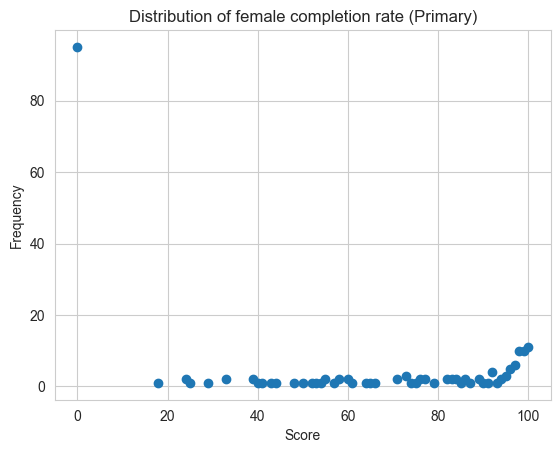

In [146]:
plt.scatter(female_completion_rate_scores,female_completion_rate_count )
plt.title('Distribution of female completion rate (Primary)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

On scatter plot we found the outlier where most of the scores are 0

# <font color="orange">TASK</font> - Numerical columns

Create a new DataFrame which consists only of ***numerical*** columns from the original dataset.

In [147]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# df.select_dtypes(include=numerics)

In [148]:
numerical_df = df.select_dtypes(include='number')

In [149]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 1   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 2   OOSR_Primary_Age_Male                    202 non-null    int64  
 3   OOSR_Primary_Age_Female                  202 non-null    int64  
 4   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 5   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 6   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 7   OOSR_Upper_Secondary_Age_Female          202 non-null    int64  
 8   Completion_Rate_Primary_Male             202 non-null    int64  
 9   Completion_Rate_Primary_Female           202 non-null    int64  
 10  Completion_Rate_Lower_Secondary_Male     202 non-n

# <font color="orange">TASK</font> - Correlation between variables

Find what is the ***correlation coefficient*** between all the columns in your new numerical DataFrame.
Plot a ***heatmap*** of the correlation coefficients.

In [150]:
corr_matrix = numerical_df.corr()
corr_matrix

,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
OOSR_Pre0Primary_Age_Male,1.000000,0.984145,0.541979,0.578650,0.534625,0.533876,0.475048,0.476920,0.123699,0.119958,...,-0.097947,-0.115318,-0.359043,-0.358424,0.002011,-0.012017,0.451898,-0.083844,-0.362917,0.130623
OOSR_Pre0Primary_Age_Female,0.984145,1.000000,0.537058,0.582072,0.531879,0.539081,0.456563,0.467279,0.129993,0.123218,...,-0.101869,-0.108964,-0.344785,-0.346009,0.008926,-0.006110,0.469859,-0.049785,-0.336194,0.132268
OOSR_Primary_Age_Male,0.541979,0.537058,1.000000,0.964160,0.560956,0.572686,0.406544,0.419825,-0.002112,-0.019832,...,-0.050654,-0.073999,-0.258051,-0.265992,0.018375,0.005537,0.388390,-0.179302,-0.293258,0.074100
OOSR_Primary_Age_Female,0.578650,0.582072,0.964160,1.000000,0.660776,0.698991,0.483657,0.517142,-0.000240,-0.027413,...,-0.065103,-0.089894,-0.264240,-0.271403,0.034565,0.014447,0.413471,-0.184440,-0.299394,0.048978
OOSR_Lower_Secondary_Age_Male,0.534625,0.531879,0.560956,0.660776,1.000000,0.966085,0.807592,0.808483,0.103940,0.080384,...,-0.071948,-0.071277,-0.310789,-0.329829,0.034276,0.006352,0.438541,-0.036796,-0.331477,-0.030075
OOSR_Lower_Secondary_Age_Female,0.533876,0.539081,0.572686,0.698991,0.966085,1.000000,0.772854,0.812555,0.068481,0.034002,...,-0.073749,-0.083238,-0.302235,-0.318292,0.007934,-0.025590,0.465821,-0.035797,-0.328637,-0.042566
OOSR_Upper_Secondary_Age_Male,0.475048,0.456563,0.406544,0.483657,0.807592,0.772854,1.000000,0.965080,0.161697,0.147931,...,-0.083403,-0.054080,-0.359459,-0.377139,0.128415,0.108487,0.378810,-0.030308,-0.378626,-0.103774
OOSR_Upper_Secondary_Age_Female,0.476920,0.467279,0.419825,0.517142,0.808483,0.812555,0.965080,1.000000,0.136056,0.111010,...,-0.075684,-0.069173,-0.358775,-0.375763,0.100055,0.073178,0.443845,0.002852,-0.382639,-0.104612
Completion_Rate_Primary_Male,0.123699,0.129993,-0.002112,-0.000240,0.103940,0.068481,0.161697,0.136056,1.000000,0.993618,...,0.061909,0.140279,-0.193224,-0.253032,0.256216,0.252927,0.295921,0.170565,-0.178579,0.277663
Completion_Rate_Primary_Female,0.119958,0.123218,-0.019832,-0.027413,0.080384,0.034002,0.147931,0.111010,0.993618,1.000000,...,0.065865,0.140531,-0.186450,-0.246440,0.262168,0.264148,0.272437,0.177076,-0.173107,0.281272


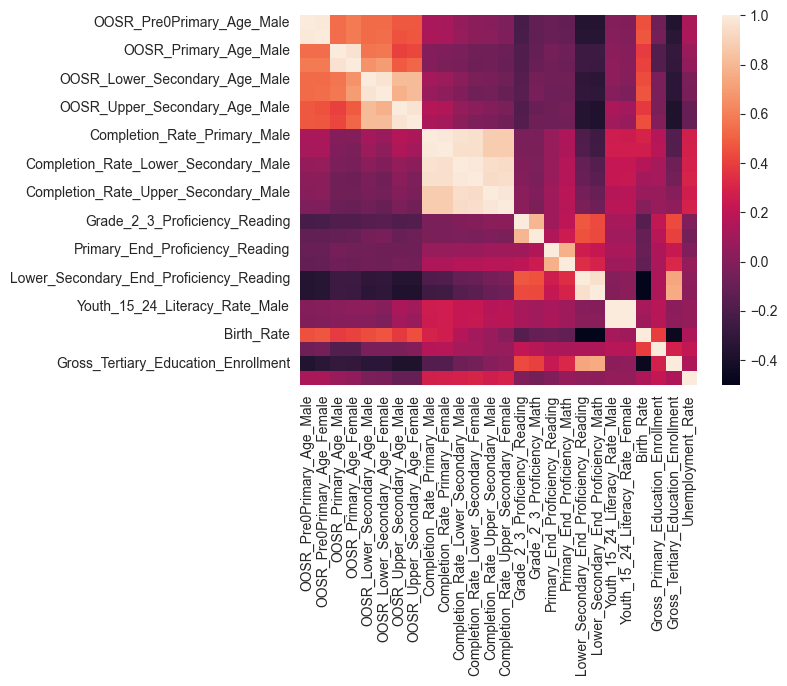

In [151]:
sns.heatmap(corr_matrix)
plt.show()

# <font color="orange">TASK</font> - Unemployment drivers

What are the most correlated variables with the unemployment measurement?
Note: Consider using ***absolute*** values.


In [152]:
corr_matrix['Unemployment_Rate'].sort_values(ascending=False)

Unemployment_Rate                          1.000000
Completion_Rate_Lower_Secondary_Female     0.297181
Completion_Rate_Lower_Secondary_Male       0.285564
Completion_Rate_Upper_Secondary_Female     0.285201
Completion_Rate_Primary_Female             0.281272
Completion_Rate_Primary_Male               0.277663
Completion_Rate_Upper_Secondary_Male       0.267683
Gross_Primary_Education_Enrollment         0.215464
Birth_Rate                                 0.143130
Gross_Tertiary_Education_Enrollment        0.140702
OOSR_Pre0Primary_Age_Female                0.132268
OOSR_Pre0Primary_Age_Male                  0.130623
OOSR_Primary_Age_Male                      0.074100
Primary_End_Proficiency_Math               0.061507
Youth_15_24_Literacy_Rate_Female           0.055326
Youth_15_24_Literacy_Rate_Male             0.052013
OOSR_Primary_Age_Female                    0.048978
Lower_Secondary_End_Proficiency_Reading    0.032903
Lower_Secondary_End_Proficiency_Math       0.029691
Primary_End_

In [153]:
absolute_unemployment_drivers = corr_matrix['Unemployment_Rate'].abs().sort_values(ascending=False)
absolute_unemployment_drivers

Unemployment_Rate                          1.000000
Completion_Rate_Lower_Secondary_Female     0.297181
Completion_Rate_Lower_Secondary_Male       0.285564
Completion_Rate_Upper_Secondary_Female     0.285201
Completion_Rate_Primary_Female             0.281272
Completion_Rate_Primary_Male               0.277663
Completion_Rate_Upper_Secondary_Male       0.267683
Gross_Primary_Education_Enrollment         0.215464
Birth_Rate                                 0.143130
Gross_Tertiary_Education_Enrollment        0.140702
OOSR_Pre0Primary_Age_Female                0.132268
OOSR_Pre0Primary_Age_Male                  0.130623
OOSR_Upper_Secondary_Age_Female            0.104612
OOSR_Upper_Secondary_Age_Male              0.103774
OOSR_Primary_Age_Male                      0.074100
Primary_End_Proficiency_Math               0.061507
Grade_2_3_Proficiency_Math                 0.057321
Youth_15_24_Literacy_Rate_Female           0.055326
Youth_15_24_Literacy_Rate_Male             0.052013
OOSR_Primary

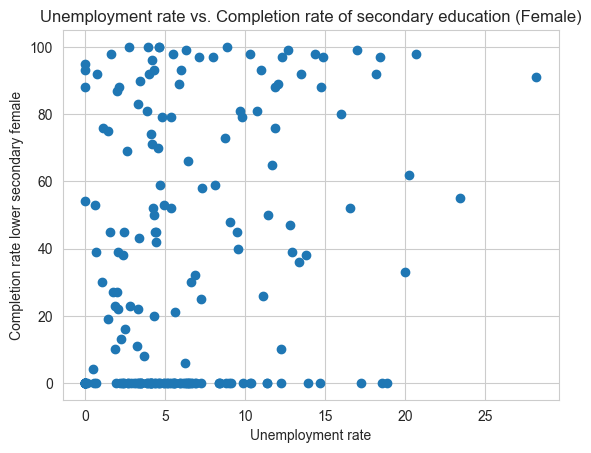

In [154]:
plt.scatter(df['Unemployment_Rate'], df['Completion_Rate_Lower_Secondary_Female'])
plt.title('Unemployment rate vs. Completion rate of secondary education (Female)')
plt.xlabel('Unemployment rate')
plt.ylabel('Completion rate lower secondary female')
plt.show()

In [155]:
top_5_drivers = absolute_unemployment_drivers.head(6).index.values
top_5_drivers

array(['Unemployment_Rate', 'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Completion_Rate_Primary_Female', 'Completion_Rate_Primary_Male'],
      dtype=object)

In [156]:
top_5_corr_matrix = df[top_5_drivers].corr()

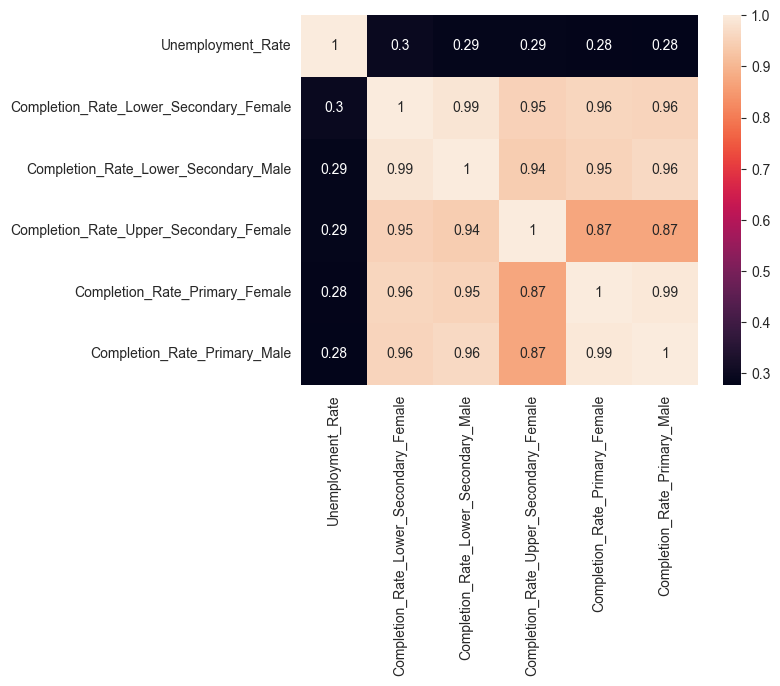

In [157]:
sns.heatmap(top_5_corr_matrix, annot=True)
plt.show()

# <font color="orange">TASK</font> - Group unemployment by country

Group your dataset by ***country***, finding the ***mean*** of the ***unemployment rate***.

In [158]:
mean_unemployment_by_country = df.groupby(by='Countries_and_areas')['Unemployment_Rate'].mean()

# <font color="orange">TASK</font> - Top 15 countries by unemployment

Find the top 15 countries by unemployment.
Plot a ***horizontal bar plot***.
***Figure size*** should be 9 by 7.
***Figure dpi*** should be 300.
***First three bars*** should be with the color ***#32a852***
***The rest of the bars*** should be with the color ***#9ad6aa***

In [159]:
top_15_countries = mean_unemployment_by_country.nlargest(n=15)
top_15_countries

Countries_and_areas
South Africa                        28.18
Lesotho                             23.41
Saint Lucia                         20.71
Namibia                             20.27
Gabon                               20.00
Saint Vincent and the Grenadines    18.88
Libya                               18.56
Bosnia and Herzegovina              18.42
Botswana                            18.19
Greece                              17.24
Armenia                             16.99
Sudan                               16.53
Tunisia                             16.02
Montenegro                          14.88
Jordan                              14.72
Name: Unemployment_Rate, dtype: float64

In [160]:
color_map = ['#9ad6aa' for col in range(15)]
color_map[0] = color_map[1] = color_map[2] = '#32a852'

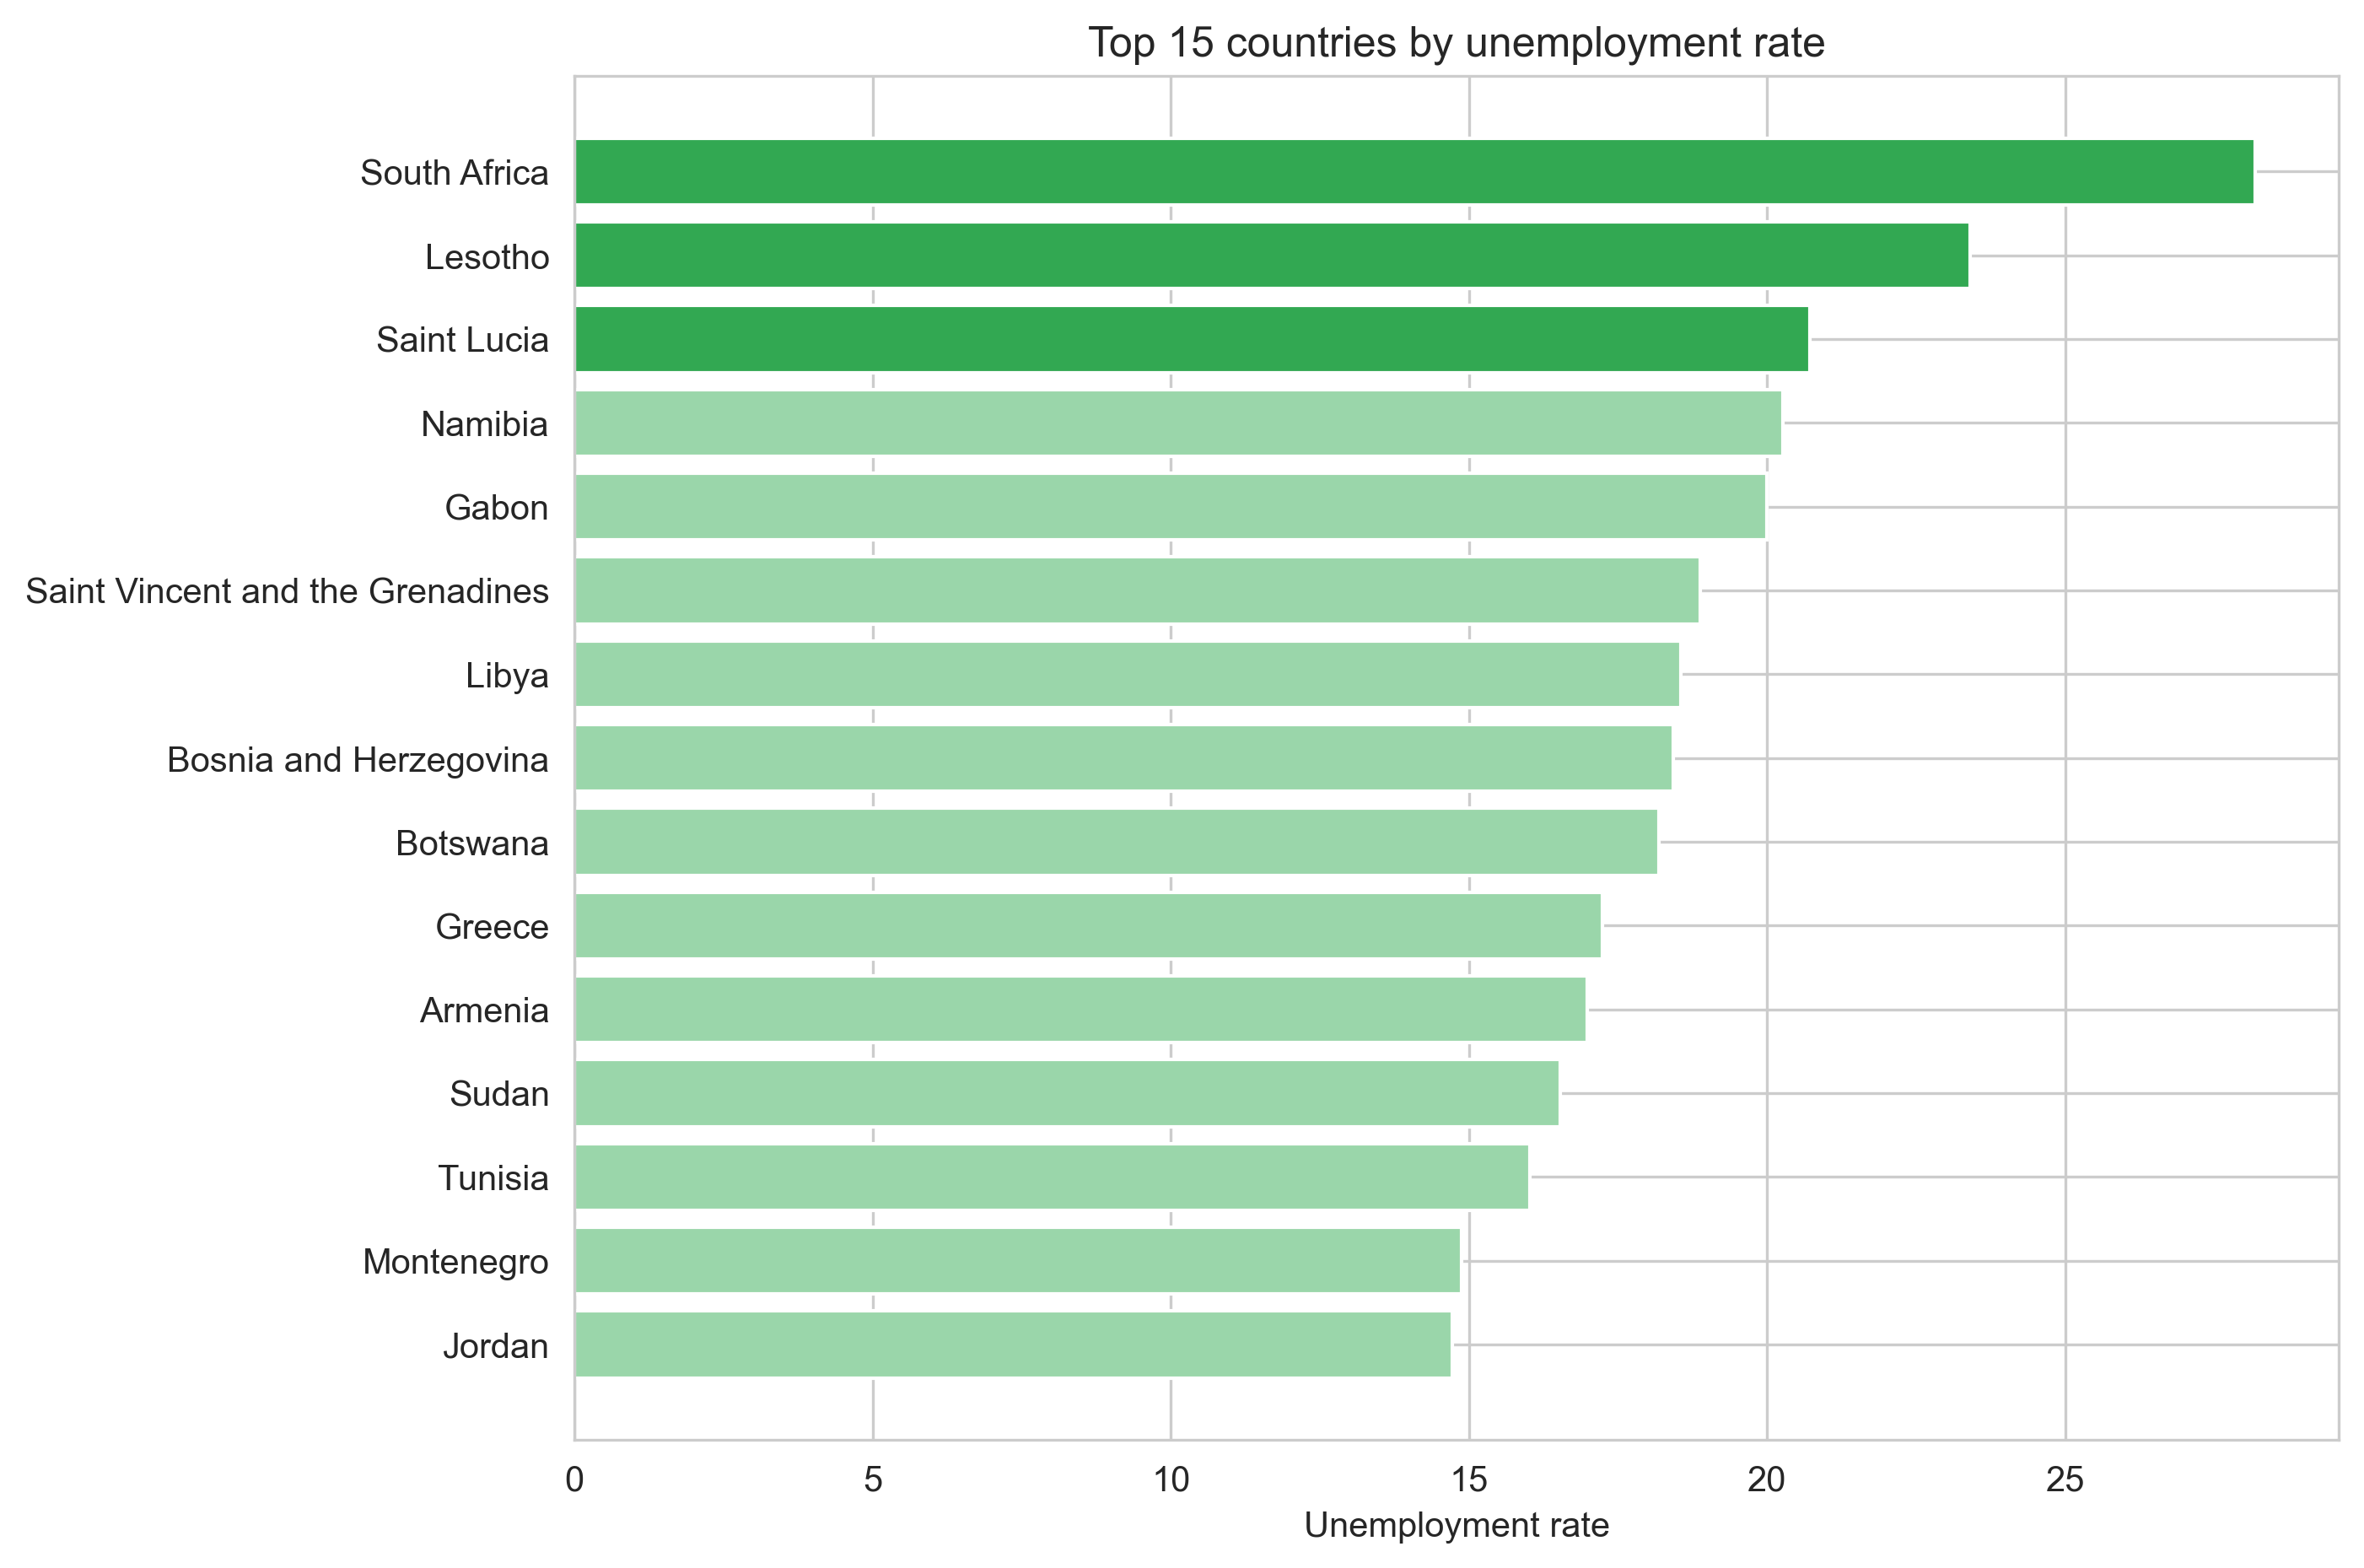

In [161]:
plt.figure(figsize=(9, 7), dpi=300)
plt.barh(top_15_countries.index.values[::-1], top_15_countries.values[::-1], color=color_map[::-1])
plt.title('Top 15 countries by unemployment rate')
plt.xlabel('Unemployment rate')
plt.show()

# <font color="orange">TASK</font> - Birth rate and enrollment

Plot a ***scatter plot*** of the birth rate and the two enrollment variables.
Place a ***legend*** in the ***upper left corner***.


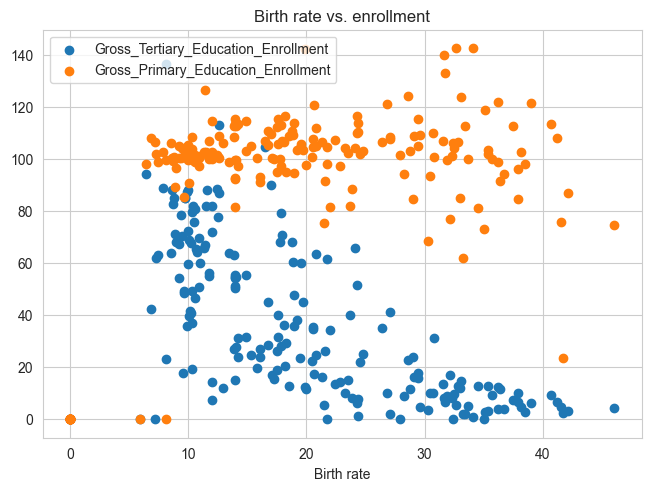

In [162]:
plt.figure(layout='constrained')
plt.scatter(df.Birth_Rate, df.Gross_Tertiary_Education_Enrollment, label='Gross_Tertiary_Education_Enrollment')
plt.scatter(df.Birth_Rate, df.Gross_Primary_Education_Enrollment, label='Gross_Primary_Education_Enrollment')
plt.title('Birth rate vs. enrollment')
plt.xlabel('Birth rate')
plt.legend(loc='upper left')
plt.show()